In [12]:
%matplotlib inline
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML

#Hacer que las figuras por defecto salgan más grandes
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
import os

import math

import warnings
warnings.filterwarnings('ignore')
import utils as U
import UPVlog
nombre_cuaderno='P2-2-DSF'
mylogger=UPVlog.UPVlog(nombre_cuaderno)


# Ejercicio Autónomo DSF

En este ejercicio se trata de replicar el estudio hecho con la onda cuadrada en el cuaderno P2-2 con otra forma de onda.

Los pasos que seguiremos serán:

* Creación de la forma de onda

* Creación del espectro a partir de la expresión matemática de los coeficientes

* Obtener aprox. parciales para distinto número de armónicos


La señal que emplearemos será la **sinusoide rectificada onda completa**

<center>
    <img title="SIn FUll Rect" alt="Sin Full Rect" src="images/sinrectfull.png" width=600>
</center>

## Ejemplo sinusoide rectificada  onda completa

### Obtención de la forma de onda en el tiempo

Implementaremos una función *seno_fullRectified()* que partiendo de una sinusoide de amplitud "1" obtenga la forma de onda en los insantes "t"

In [13]:
# Completar la función
def seno_fullRectified(frecuencia,t):
    '''
    frecuencia: frecuencia de la sinusoide de partida
    t: instantes de tiempo

    Se genera inicialmente una sinusoide

    A PARTIR DE ELLA se obtiene la señal rectificada
    '''
    out = None
    sinusoide = np.sin( 2 * math.pi * frecuencia * t )

    ### BEGIN SOLUTION
    out =np.abs(sinusoide)
    ### END SOLUTION

    return out

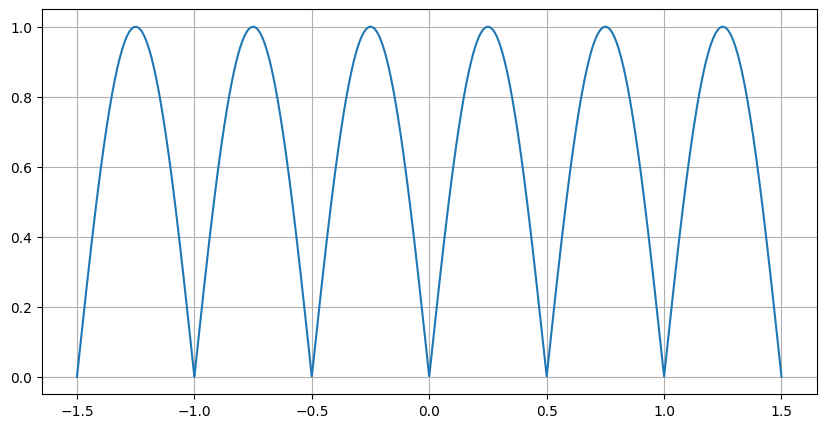

In [14]:
# Comprobación
t=np.linspace(-1.5,1.5,5000)
mylogger.log("Testing seno_fullRectified()")
### BEGIN TESTS
s=seno_fullRectified(1,t)
assert s is not None,"Funcion seno_fullRectified() no implementada"
### END TESTS

### BEGIN HIDDEN TESTS
### AUTOTEST seno_fullRectified(2.3,t[:2000])
### END HIDDEN TESTS

mylogger.log("Success Testing seno_fullRectified()")
#Comprobar el aspecto de la gráfica para ver que es correcto.
_=plt.plot(t,s)
_=plt.grid()

### Obtención del espectro

Considerando como frecuencia fundamental, $f_0$, la de la sinusoide que se rectifica, la expresión de los coeficientes **bilaterales**  es:

<center>
<img src="images/formula.png" width=200>    
</center>
    
y cero para $n$ impar.


In [21]:
def espectro_seno_rectificado_completa(numcomponentes,f0):

    '''
    f0: frecuencia de la sinusoide que se ha rectificado
    
    Función que devuelve el espectro unilateral de una onda senoidal rectificada  como
    lista de tuplas (frec,ampl,fase)
    '''
    espectro = None
    ### BEGIN SOLUTION
    ks=np.arange(numcomponentes)
    frecuencias =ks*f0
    amplitudes = 0.0*ks # Todo ceros
    amplitudes[0::2]=2/math.pi/(1-ks[0::2]**2) # Los pares: Esto sale de la fórmula
    # Lo anterior son bilaterales. Para pasar a unilateral multiplico por 2 excepto el primero
    amplitudes[1:] *= 2.0 
   
    fases=ks*0

    #complejos=amplitudes*np.exp(1j*fases)
    #amplitudes=np.abs(complejos)
    #fases=np.angle(complejos)

    espectro=[]
    for k in ks:
        componente=(frecuencias[k],amplitudes[k],fases[k])
        espectro.append(componente)
    ### END SOLUTION        
    return espectro

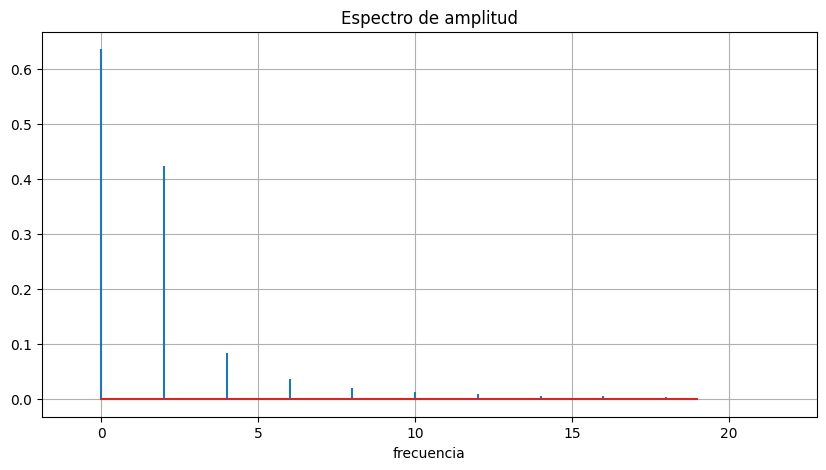

In [22]:
mylogger.log("Testing Espectro Seno Rectificado Onda Completa")

# Compruebe que no hay errores y que la gráfica se parece a la que se proporciona
### BEGIN TESTS
espectro = espectro_seno_rectificado_completa(20,1)
assert espectro is not None, "Función no implementada"
aas=np.array([b[1] for b in espectro])
assert np.max(np.abs(aas[1::2]))<1e-5

# Dibujamos el espectro y comprobamos que es similar al que se muestra
U.dibujaEspectro(espectro)

### END TESTS

### BEGIN HIDDEN TESTS

def kk_espectro_seno_rectificado_completa(numcomponentes,f0):

    '''
    f0: frecuencia de la sinusoide que se ha rectificado
    
    Función que devuelve el espectro unilateral de una onda senoidal rectificada  como
    lista de tuplas (frec,ampl,fase)
    '''
    espectro = None
    
    ks=np.arange(numcomponentes)
    frecuencias =ks*f0
    amplitudes = 0.0*ks # Todo ceros
    amplitudes[0::2]=2/math.pi/(1-ks[0::2]**2) # Los pares: Esto sale de la fórmula
    # Lo anterior son bilaterales. Para pasar a unilateral multiplico por 2 excepto el primero
    amplitudes[1:] *= 2.0 
   
    fases=ks*0

    complejos=amplitudes*np.exp(1j*fases)
    amplitudes=np.abs(complejos)
    fases=np.angle(complejos)

    espectro=[]
    for k in ks:
        componente=(frecuencias[k],amplitudes[k],fases[k])
        espectro.append(componente)
           
    return espectro
solalumno= espectro_seno_rectificado_completa(40,1)    
soloficial=kk_espectro_seno_rectificado_completa(40,1)

amplalumnos=np.array([v[1] for v in solalumno])
amploficial=np.array([v[1] for v in soloficial])

fasealumnos=np.array([v[2] for v in solalumno])
faseoficial=np.array([v[2] for v in soloficial])

frecalumnos=np.array([v[0] for v in solalumno])
frecoficial=np.array([v[0] for v in soloficial])

assert np.allclose(frecalumnos,frecoficial,atol=1e-5,rtol=0)

complejosalumnos=amplalumnos*np.exp(1j*fasealumnos)
complejosoficial=amploficial*np.exp(1j*faseoficial)
assert np.allclose(complejosalumnos,complejosoficial,atol=1e-5,rtol=0)

### END HIDDEN TESTS

mylogger.log("Success Testing Espectro Seno Rectificado Onda Completa")


El espectro obtenido debe ser similar a:

<center>
    <img src="images/espfull.png" width=400>
</center>

### Aproximaciones parciales con pocos armónicos

En este punto veremos cómo a medida que se van sumando más armónicos la aproximación a la señal original se va haciendo mejor


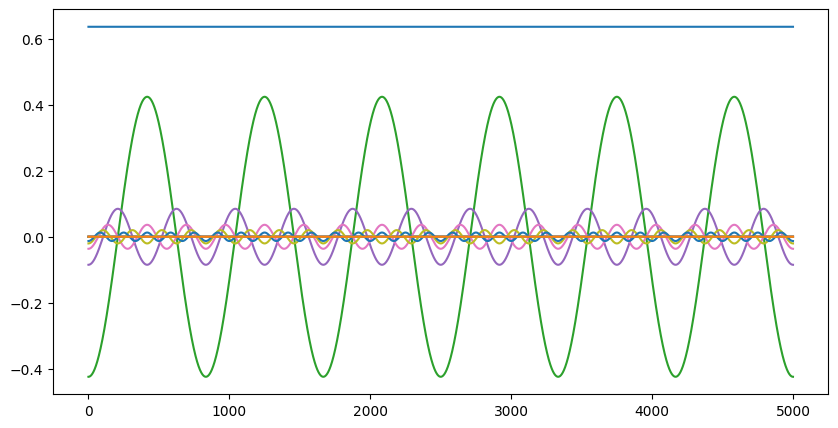

In [23]:
# Obtenemos las distintas sinusoides que componen la señal
componentes=U.creaComponentes(espectro,t)

# Visualizamos las primeras sinusoides por separado
_=plt.plot(componentes[:,:12])

### Creación de una animación mostrando las aproximaciones parciales

Genere una animación que resulte en algo similar a :

<center>
    <img src="images/muestra.gif" width=700>
</center>
Debe cumplir lo siguiente:

* El título NO puede tener el texto "Muestra"

* El número de fotogramas debe llegar hasta 30, teniendo en cuenta que solo los armónicos de frecuencias pares son distintos de cero

Puede "inspirarse" en lo visto en otros cuadernos



In [24]:
# Crear animación viendo como va aproximándose al aumentar los armonicos
fig, ax = plt.subplots()
espectro100= espectro_seno_rectificado_completa(100,1)
componentes100=U.creaComponentes(espectro100,t)
num_fotogramas=30

### BEGIN SOLUTION
# Fijar los ejes de la gráfica. Permanecen en la animación
ax.axis( [-1.5 , 1.5, -0.2 , 1.2])
ax.plot(t,s)
l2,=ax.plot(t,componentes100[:,0])
_=plt.grid()

# Función para generar gráfica del instante i
def animate(i):
    k=2*i  
    suma=np.sum(componentes100[:,:k+1],axis=1)
    l2.set_data(t,suma)
    ax.set_title("Muestra DC + " + str(k//2) + " armonicos")

ani=matplotlib.animation.FuncAnimation(fig=fig, func=animate, frames=num_fotogramas)
_=plt.close(fig)

### END SOLUTION

HTML(ani.to_jshtml())

Celda para evaluar manualmente la animación creada

No es necesario escribir nada
